In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle as pkl
import os 

In [3]:
labels=[]
with open("./labels_135.pickle","rb") as file:
    labels=pkl.load(file)

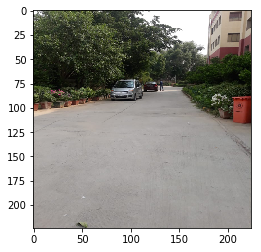

In [4]:
img=cv2.imread("./Data/images/IMG-20190708-WA0000.jpg")
img=cv2.resize(img,(224,224))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [31]:
#translation or cropping 1
def translation(img,coor):
    coor=np.array(coor)
    coor=coor.reshape((-1,4))
    img=cv2.resize(img,(224,224))
    rows,cols,_ = img.shape
    dst=img
    M = np.float32([[1,0,0],[0,1,50]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    M = np.float32([[1,0,0],[0,1,-50]])
    dst = cv2.warpAffine(dst,M,(cols,rows))
    dst=dst[50:-50,:,:]
    dst=cv2.resize(dst,(224,224))
    coor[:,1]=(coor[:,1]-50) * 224/ 124.0
    coor[:,3]=(coor[:,3]-50) * 224/ 124.0
    return dst,coor.reshape((-1,4))


In [32]:
# Rotation and Scaling 2 
def rotationScale(img,coor,angle=5,scale=1.1):
    coor=np.array(coor)
    img=cv2.resize(img,(224,224))
    coor=coor.reshape((-1,2,2))
    rows,cols,_ = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,scale)
    dst = cv2.warpAffine(img,M,(cols,rows))
    dst=cv2.resize(dst,(224,224))
    coor=np.array(cv2.transform(coor,M))
#     print(coor)
    return dst,coor.reshape((-1,4))

In [33]:
#FLIP 3
def flip(img,coor):
    coor=np.array(coor)
    img=cv2.resize(img,(224,224))
    coor=coor.reshape((-1,4))
    dst=cv2.flip(img,1)
    dst=cv2.resize(dst,(224,224))
#     print(coor)
    coor[:,0]=224-coor[:,0]
    coor[:,2]=224-coor[:,2]
    return dst,coor.reshape((-1,4))

In [57]:
def augmentation(labels):
    augment_labels=[]
    count=1
    for image in labels:
        if image[1][0]==0:
            continue
        img=cv2.imread("./Data/images/"+image[0])
        augs=[]
        augs.append(translation(img,image[1][1]))             #1
        augs.append(rotationScale(img,image[1][1]))           #2
        augs.append(rotationScale(img,image[1][1],angle=-7))  #3
        augs.append(rotationScale(img,image[1][1],angle=0))   #4
        augs.append(flip(img,image[1][1]))                    #5
        i=0
        for augim in augs:
            name=image[0].split(".")[0]+"_"+str(i+1)+".jpg"
            i+=1
            cv2.imwrite("./Data/aug_images/"+name,augim[0])
            augment_labels.append((name,(image[1][0],augim[1],image[1][-1])))
        print(count,end=" ")
        count+=1
    return augment_labels

In [58]:
augment_labels=augmentation(labels=labels)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 

In [60]:
len(augment_labels)

660

In [61]:
with open("./augments_label.pickle","wb") as file:
    pkl.dump(augment_labels,file)

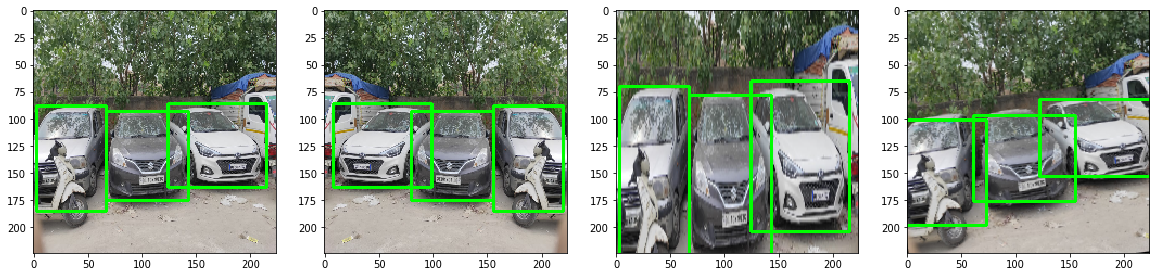

In [53]:
a=np.random.randint(0,135)
image=labels[a]
img=cv2.imread("./Data/images/"+image[0])

fig=plt.figure(figsize=(20,20))

ax1=fig.add_subplot(1,4,2)
im,coor=flip(img,image[1][1])
for i in range(coor.shape[0]):
    im=cv2.rectangle(im,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)
ax1.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

ax1=fig.add_subplot(1,4,3)
im,coor=translation(img,image[1][1])
for i in range(coor.shape[0]):
    im=cv2.rectangle(im,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)
ax1.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

ax1=fig.add_subplot(1,4,4)
im,coor=rotationScale(img,image[1][1],angle=7)
for i in range(coor.shape[0]):
    im=cv2.rectangle(im,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)
ax1.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

ax1=fig.add_subplot(1,4,1)
coor=np.array(image[1][1])
img=cv2.resize(img,(224,224))
for i in range(coor.shape[0]):
    img=cv2.rectangle(img,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)

ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))